In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set()
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
DATA_PATH = Path("../data/x5-retail/data/")
FIGS_PATH = Path("figures/eda-x5-retail/")

In [8]:
df = pd.read_parquet("../../data/x5-retail/preprocessed/train")


0          67
1         237
2          54
3          81
4         102
         ... 
319122    273
319123     15
319124    104
319125     62
319126    203
Name: _seq_len, Length: 319127, dtype: int32

<Axes: >

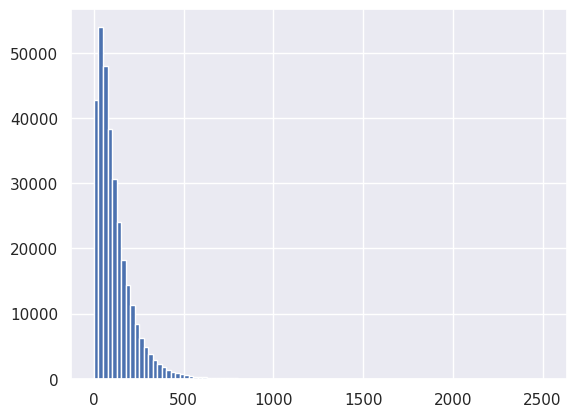

In [10]:

df["_seq_len"].hist(bins=100)

# Products

In [3]:
df_prod = pd.read_csv(DATA_PATH / "products.csv")
df_prod

,product_id,level_1,level_2,level_3,level_4,segment_id,brand_id,vendor_id,netto,is_own_trademark,is_alcohol
0,0003020d3c,c3d3a8e8c6,c2a3ea8d5e,b7cda0ec0c,6376f2a852,123.0,394a54a7c1,9eaff48661,0.400,0,0
1,0003870676,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,acd3dd483f,10486c3cf0,0.680,0,0
2,0003ceaf69,c3d3a8e8c6,f2333c90fb,419bc5b424,f6148afbc0,271.0,f597581079,764e660dda,0.500,0,0
3,000701e093,ec62ce61e3,4202626fcb,88a515c084,48cf3d488f,172.0,54a90fe769,03c2d70bad,0.112,0,0
4,0007149564,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,63417fe1f3,f329130198,0.600,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43033,fffac3a287,e344ab2e71,52f13dac0c,0f84eb7480,420c3b3f0b,150.0,5aef526287,f546d8aa6f,0.085,0,0
43034,fffd2946cf,e344ab2e71,52f13dac0c,a1786084ca,b2960bceb8,176.0,7bf16d4aa4,3d8c5ef5f4,0.130,0,0
43035,fffd7fb409,e344ab2e71,1d2939ba1d,2721c4b3d6,32f03574dd,255.0,1267326e16,0cfa052441,0.450,0,0
43036,fffd963a2c,c3d3a8e8c6,c2a3ea8d5e,a6b0dd76e0,a7e8f1cc02,220.0,c2eec3be6f,75ea3d1182,0.300,0,0


In [4]:
df_prod.nunique()

product_id          43038
level_1                 3
level_2                42
level_3               201
level_4               790
segment_id            116
brand_id             4296
vendor_id            3193
netto                 780
is_own_trademark        2
is_alcohol              2
dtype: int64

In [5]:
df_prod.groupby("level_2")["level_1"].nunique().max()

1

`level_2` implies `level_1`. If we use `level_2` as a feature we may omit (and better do) `level_1`.

# Clients

In [6]:
df_cl = pd.read_csv(DATA_PATH / "clients.csv")
df_cl

,client_id,first_issue_date,first_redeem_date,age,gender
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F
2,000048b7a6,2018-12-15 13:33:11,NaN,68,F
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60,F
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67,U
...,...,...,...,...,...
400157,fffece623e,2018-05-13 15:09:30,2018-12-27 19:06:39,67,U
400158,ffff3dfff8,2018-11-01 16:06:52,2018-12-07 17:33:47,56,F
400159,ffffaab9da,2017-08-25 18:43:24,2017-12-08 17:53:19,23,F
400160,ffffeb5619,2017-12-05 13:26:28,NaN,62,U


In [8]:
len(df_cl.query("age >= 10 and age <= 90"))

398668

## Gender

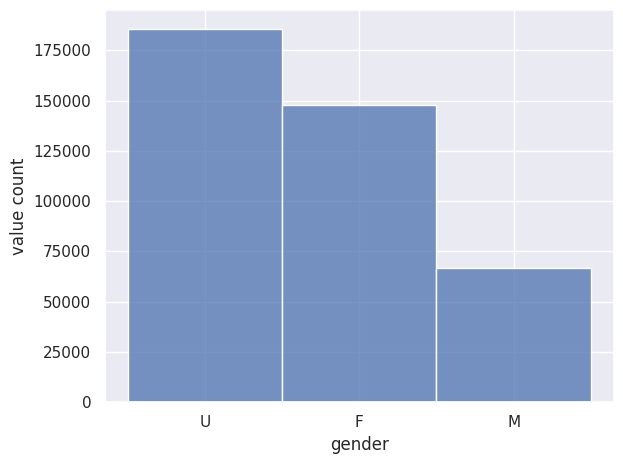

In [9]:
fig, ax = plt.subplots(layout="tight")

sns.histplot(df_cl.gender)
ax.set_xlabel("gender")
ax.set_ylabel("value count")

fig.savefig(FIGS_PATH / "gender_hist.svg")

Many unknown value, bad for prediction

## Age

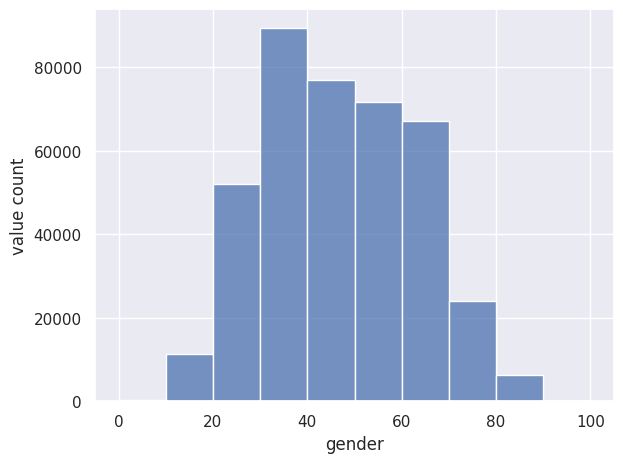

In [10]:
fig, ax = plt.subplots(layout="tight")

sns.histplot(df_cl.age, bins=10, binrange=(0, 100))
ax.set_xlabel("gender")
ax.set_ylabel("value count")

fig.savefig(FIGS_PATH / "age_hist.svg")

In [11]:
df_cl.age.agg(["min", "max"])

min   -7491
max    1901
Name: age, dtype: int64

Not all ages are true, obvoiusly.

In [12]:
def eq_prob_thresholds(x, bins, axis=-1):
    """Compute bounds of equal probability bins."""
    
    x = np.sort(x, axis=axis)
    length = x.shape[axis]
    idx = np.round(np.linspace(0, 1, bins + 1) * (length - 1)).astype(int)
    return np.take(x, idx, axis)

In [13]:
eq_prob_thresholds(df_cl.age, 6)

array([-7491,    30,    37,    45,    55,    64,  1901])

In [14]:
df_cl.age.count()

400162

# Transactions 

In [15]:
%%time

df_tx = pd.read_csv(DATA_PATH / "purchases.csv")

CPU times: user 1min 4s, sys: 16.4 s, total: 1min 21s
Wall time: 1min 45s


In [16]:
df_tx

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,9a80204f78,2.0,80.0,NaN
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,da89ebd374,1.0,65.0,NaN
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,NaN
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,NaN
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,a685f1916b,1.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45786563,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,24d5a54f42,1.0,164.0,NaN
45786564,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,7427d0830d,1.0,134.0,NaN
45786565,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,6c547c2ca8,1.0,60.0,NaN
45786566,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,d04e7a8338,1.0,48.0,NaN


In [17]:
df_tx_aggs = (
    df_tx
    .groupby(["client_id", "transaction_id"])
    .agg({
        "purchase_sum": ["min", "max"],
        "trn_sum_from_iss": "sum",
        "trn_sum_from_red": ["min", "max", "sum"],
    })
)
df_tx_aggs

purchase_sum         trn_sum_from_iss  \
                                   min     max              sum   
client_id  transaction_id                                         
000012768d 6a0e96d0bc            803.0   803.0            804.0   
           7e3e2e3984           1007.0  1007.0           1007.0   
           b34f23306e            419.0   419.0            419.0   
           c1ca85d462            574.0   574.0            575.0   
000036f903 0a3d640bf4            700.0   700.0            700.0   
...                                ...     ...              ...   
fffff6ce77 e9182e5887            157.0   157.0            158.0   
           eba2694c0c            446.0   446.0            446.0   
           f0af5bcc0b            183.0   183.0            183.0   
           f58417b669           2077.0  2077.0           2077.0   
           f8dd10c7f3            826.0   826.0            827.0   

                          trn_sum_from_red           
                                       min max  sum  
client_id  transaction_id                            
000012768d 6a0e96d0bc                  NaN NaN  0.0  
           7e3e2e3984                  NaN NaN  0.0  
           b34f23306e                  NaN NaN  0.0  
           c1ca85d462                  NaN NaN  0.0  
000036f903 0a3d640bf4                  NaN NaN  0.0  
...                                    ...  ..  ...  
fffff6ce77 e9182e5887                  NaN NaN  0.0  
           eba2694c0c                  NaN NaN  0.0  
           f0af5bcc0b                  NaN NaN  0.0  
           f58417b669                  NaN NaN  0.0  
           f8dd10c7f3                  NaN NaN  0.0  

[8045229 rows x 6 columns]

In [18]:
df_tx_aggs["purchase_sum"].eval("min == max").mean()

1.0

`purchase_sum` is calculated for the whole basket

In [19]:
sum_diff = df_tx_aggs[("trn_sum_from_iss", "sum")] - df_tx_aggs[("purchase_sum", "max")]
sum_diff

client_id   transaction_id
000012768d  6a0e96d0bc        1.0
            7e3e2e3984        0.0
            b34f23306e        0.0
            c1ca85d462        1.0
000036f903  0a3d640bf4        0.0
                             ... 
fffff6ce77  e9182e5887        1.0
            eba2694c0c        0.0
            f0af5bcc0b        0.0
            f58417b669        0.0
            f8dd10c7f3        1.0
Length: 8045229, dtype: float64

In [20]:
sum_diff.describe()

count    8.045229e+06
mean    -9.895852e+00
std      5.815423e+01
min     -1.557797e+04
25%      0.000000e+00
50%      6.000000e-02
75%      1.000000e+00
max      1.300000e+01
dtype: float64

In [21]:
%%time

df = (
    df_tx
    .merge(df_cl, on="client_id")
    .merge(df_prod, on="product_id")
)

CPU times: user 50.7 s, sys: 17.9 s, total: 1min 8s
Wall time: 1min 8s


In [22]:
df

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,...,level_1,level_2,level_3,level_4,segment_id,brand_id,vendor_id,netto,is_own_trademark,is_alcohol
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,9a80204f78,...,e344ab2e71,ed2ad1797c,b25baa9dd5,51647c28e9,116.0,082560ca58,63243765ed,0.031,0,0
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,da89ebd374,...,e344ab2e71,ed2ad1797c,0767853bf3,eaeb795060,14.0,cab440afaf,43acd80c1a,0.400,1,0
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,0a95e1151d,...,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,be9c719ecd,c7609af7c3,0.230,0,0
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,4055b15e4a,...,c3d3a8e8c6,ad2b2e17d2,ca69ed9de2,c42bee16c3,69.0,f82b1d6eaa,3034fb4c4a,0.150,0,0
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,a685f1916b,...,e344ab2e71,52f13dac0c,0f84eb7480,420c3b3f0b,150.0,032202eff9,ca1ac137e8,0.080,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45786563,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,24d5a54f42,...,c3d3a8e8c6,ad2b2e17d2,eda7b2976b,219dc891a8,308.0,554df8bb37,4c22f7a9d8,0.250,0,0
45786564,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,7427d0830d,...,c3d3a8e8c6,f2333c90fb,419bc5b424,499cfd1ba2,113.0,d77dbdf2d8,c71c32c1cc,0.360,0,0
45786565,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,6c547c2ca8,...,e344ab2e71,ed2ad1797c,0767853bf3,f8174fb475,14.0,4c089cfed9,83d42c099e,0.415,0,0
45786566,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,d04e7a8338,...,c3d3a8e8c6,ad2b2e17d2,e33cc0b2a4,5330a84194,1.0,d41f146e83,6d23b46e12,1.000,0,0


In [23]:
pd.DataFrame({
    "count": df.count(),
    "nunique": df.nunique(),
    "dtype": df.dtypes,
})

,count,nunique,dtype
client_id,45786568,400162,object
transaction_id,45786568,8045201,object
transaction_datetime,45786568,4260251,object
regular_points_received,45786568,2224,float64
express_points_received,45786568,13,float64
regular_points_spent,45786568,1147,float64
express_points_spent,45786568,78,float64
purchase_sum,45786568,258231,float64
store_id,45786568,13882,object
product_id,45786568,42530,object


In [24]:
purch_cnt = df.groupby("client_id")["transaction_datetime"].nunique()
purch_cnt

client_id
000012768d     4
000036f903    32
000048b7a6     8
000073194a    17
00007c7133    11
              ..
fffece623e    24
ffff3dfff8    17
ffffaab9da     7
ffffeb5619     7
fffff6ce77    32
Name: transaction_datetime, Length: 400162, dtype: int64

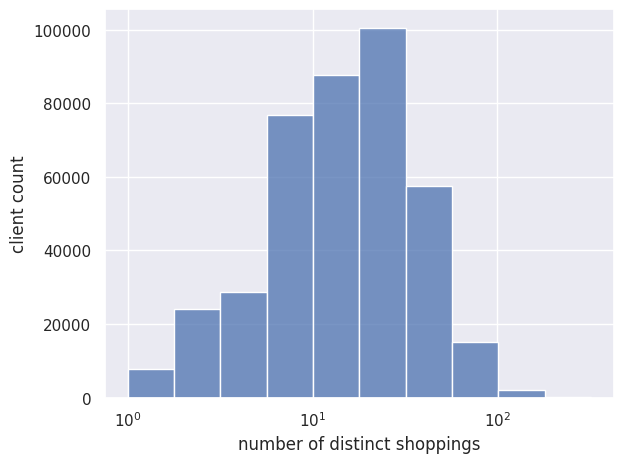

In [25]:
fig, ax = plt.subplots(layout="tight")

sns.histplot(purch_cnt, log_scale=True, bins=10)
ax.set_xlabel("number of distinct shoppings")
ax.set_ylabel("client count")

fig.savefig(FIGS_PATH / "shoppings_hist.svg")

In [26]:
purch_cnt.agg(["mean", "median"])

mean      20.1049
median    15.0000
Name: transaction_datetime, dtype: float64

In [27]:
tx_cnt = df.groupby("client_id").size()
tx_cnt

client_id
000012768d     52
000036f903    162
000048b7a6     56
000073194a     82
00007c7133     83
             ... 
fffece623e    117
ffff3dfff8     96
ffffaab9da     60
ffffeb5619     99
fffff6ce77    203
Length: 400162, dtype: int64

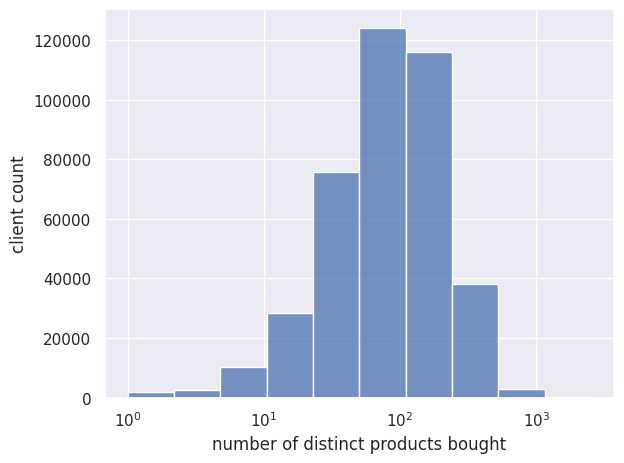

In [28]:
fig, ax = plt.subplots(layout="tight")

sns.histplot(tx_cnt, log_scale=True, bins=10)
ax.set_xlabel("number of distinct products bought")
ax.set_ylabel("client count")

fig.savefig(FIGS_PATH / "products_hist.svg")

In [29]:
tx_cnt.agg(["mean", "median"])

mean      114.42008
median     85.00000
dtype: float64

In [30]:
df.transaction_datetime.agg(["min", "max"])

min    2018-11-21 21:02:33
max    2019-03-18 23:40:03
Name: transaction_datetime, dtype: object

In [31]:
last_dt = (
    df
    .assign(transaction_datetime=lambda df: pd.to_datetime(df["transaction_datetime"]))
    .groupby("client_id")
    ["transaction_datetime"]
    .max()
)

In [32]:
tx_dts = (
    df
    .assign(transaction_datetime=lambda df: pd.to_datetime(df["transaction_datetime"]))
    [["client_id", "transaction_datetime"]]
    .sort_values(by=["client_id", "transaction_datetime"])
    .drop_duplicates()
    .set_index("client_id")
    .pipe(lambda df: df.join(df.groupby(level=0).size().rename("weights")))
    .assign(weights=lambda df: 1 / df.weights / df.index.nunique())
)

tx_dts

,transaction_datetime,weights
client_id,,
000012768d,2018-12-01 07:12:45,6.247470e-07
000012768d,2018-12-16 08:56:01,6.247470e-07
000012768d,2019-03-08 10:12:03,6.247470e-07
000012768d,2019-03-14 15:01:47,6.247470e-07
000036f903,2018-11-28 10:48:36,7.809337e-08
...,...,...
fffff6ce77,2019-02-28 12:56:31,7.809337e-08
fffff6ce77,2019-03-05 15:07:03,7.809337e-08
fffff6ce77,2019-03-06 16:26:35,7.809337e-08


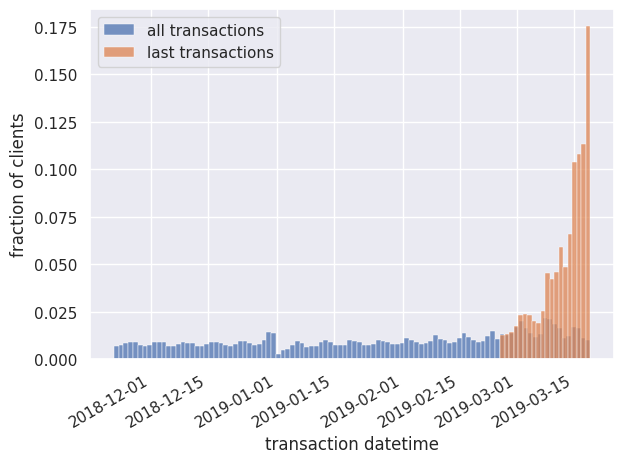

In [33]:
fig, ax = plt.subplots(layout="tight")

sns.histplot(
    tx_dts,
    x="transaction_datetime",
    weights="weights",
    bins=100,
    ax=ax,
    label="all transactions",
)

sns.histplot(
    x=last_dt,
    weights=np.ones(len(last_dt)) / len(last_dt),
    bins=20,
    ax=ax,
    label="last transactions",
)

ax.set_xlabel("transaction datetime")
ax.set_ylabel("fraction of clients")
ax.legend()
fig.autofmt_xdate()

fig.savefig(FIGS_PATH / "tx_time_hist.svg")

In [34]:
df.dtypes

client_id                   object
transaction_id              object
transaction_datetime        object
regular_points_received    float64
express_points_received    float64
regular_points_spent       float64
express_points_spent       float64
purchase_sum               float64
store_id                    object
product_id                  object
product_quantity           float64
trn_sum_from_iss           float64
trn_sum_from_red           float64
first_issue_date            object
first_redeem_date           object
age                          int64
gender                      object
level_1                     object
level_2                     object
level_3                     object
level_4                     object
segment_id                 float64
brand_id                    object
vendor_id                   object
netto                      float64
is_own_trademark             int64
is_alcohol                   int64
dtype: object